<a href="https://colab.research.google.com/github/Eddy-DIT/D.I.T/blob/main/Projet_Data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IDRISSA SYLLA**

# **Master 1 : IA**

# **DIT** 

In [251]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [252]:
df = pd.read_csv('/content/project.csv')

In [253]:
# Afficher la dimension de df
df.shape

(2823, 25)

In [254]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [255]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


# **1. L'élimination ou remplacement des données manquantes ou des données dupliquees**

In [257]:
# les lignes dupliquées
duplicates = df[df.duplicated()]

# Affichons les données dupliquée

duplicates

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE


In [258]:
# les valeurs manquantes
Valeurs_manquantes = df.isnull().sum()

# Affichont les valeurs manquantes
Valeurs_manquantes

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

### **"ADDRESSLINE2", qui a un grand nombre de valeurs manquantes, il peut être préférable de supprimer ce colonne de l'ensemble de données.**

### ***la suppression de ce colonne peut être justifiée car elle a un grand nombre de données manquantes et peuvent ne pas avoir un impact significatif sur l'analyse.***

In [259]:
# Supprimons colonnes "ADDRESSLINE2"
df.drop(['ADDRESSLINE2'], axis=1, inplace=True)

### **Remplacement des données manquantes**

### **remplacons les valeurs manquantes dans les colonnes "STATE", "POSTALCODE" et "TERRITORY" par les valeurs les plus fréquentes (mode) de chaque colonne**.



In [260]:
# Remplacer les valeurs manquantes de 'STATE' par le mode de la colonne
df['STATE'].fillna(df['STATE'].mode()[0], inplace=True)

# Remplacer les valeurs manquantes de 'POSTALCODE' par le mode de la colonne
df['POSTALCODE'].fillna(df['POSTALCODE'].mode()[0], inplace=True)

# Remplacer les valeurs manquantes de 'TERRITORY' par le mode de la colonne
df['TERRITORY'].fillna(df['TERRITORY'].mode()[0], inplace=True)


In [261]:
df.head(50)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,EMEA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,Reims,CA,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,CA,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,EMEA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,6505551386,7734 Strong St.,San Francisco,CA,28034,USA,EMEA,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,6505556809,9408 Furth Circle,Burlingame,CA,94217,USA,EMEA,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,20.16.1555,"184, chausse de Tournai",Lille,CA,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,+47 2267 3215,"Drammen 121, PR 744 Sentrum",Bergen,CA,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,6505555787,5557 North Pendale Street,San Francisco,CA,28034,USA,EMEA,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,(1) 47.55.6555,"25, rue Lauriston",Paris,CA,75016,France,EMEA,Perrier,Dominique,Medium


In [262]:
# Supprimer les lignes qui contiennent des valeurs manquantes
df = df.dropna()

In [263]:
# les valeurs manquantes
Valeurs_manquantes = df.isnull().sum()

# Affichont les valeurs manquantes
Valeurs_manquantes

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [264]:
# Afficher la dimension de df
df.shape

(2823, 24)

# **2. La détection et la correction des erreurs et des valeurs aberrantes qui peuvent affecter négativement les résultats des analyses.**

In [265]:
# Obtenir les statistiques descriptives de base
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


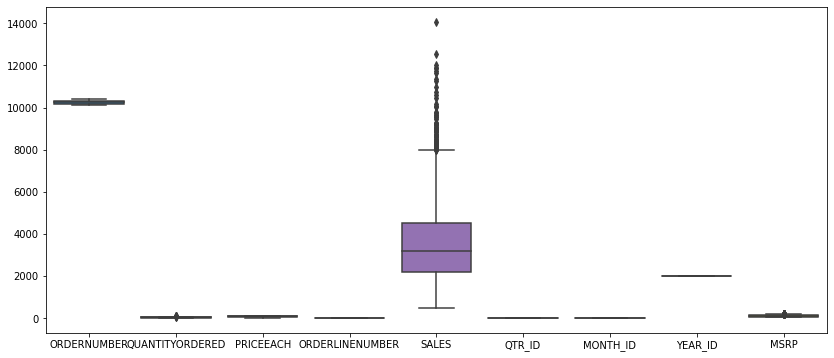

In [266]:
plt.figure(figsize=(14, 6))
sns.boxplot(data = df)
plt.show()

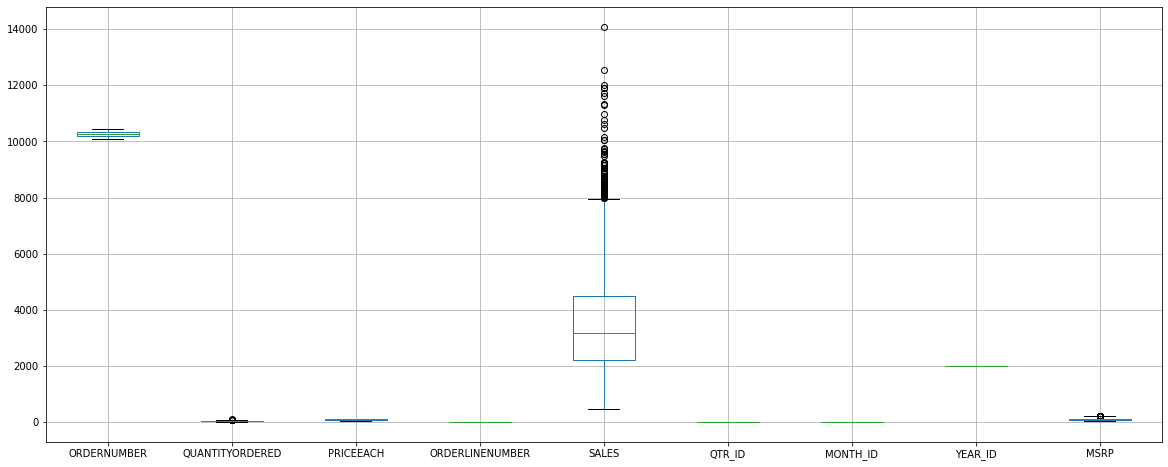

In [267]:
def myboxplot(data = df):
    plt.figure(figsize = (20,8))
    plt.grid()
    df.boxplot()

myboxplot()

In [268]:
# Pourcentage des valeurs aberrantes

# Définir les colonnes à vérifier
#cols = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']
cols = ['YEAR_ID', 'ORDERNUMBER', 'ORDERLINENUMBER', 'MONTH_ID', 'QTR_ID', 'QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']

# Calculer les limites d'intervalles pour chaque colonne
# (par exemple, pour une limite de 3 écarts types)
limits = {}
for col in cols:
    mean = np.mean(df[col])
    std = np.std(df[col])
    limits[col] = (mean - 3 * std, mean + 3 * std)

# Compter le nombre de valeurs aberrantes pour chaque colonne
outliers = {}
for col in cols:
    lower, upper = limits[col]
    outliers[col] = len(df[(df[col] < lower) | (df[col] > upper)])

# Calculer le pourcentage de valeurs aberrantes pour chaque colonne
outlier_percentages = {}
for col in cols:
    outlier_percentages[col] = outliers[col] / len(df) * 100

# Afficher les résultats
for col in cols:
    print(f"Pourcentage de valeurs aberrantes pour la colonne {col}: {outlier_percentages[col]:.2f}%")

Pourcentage de valeurs aberrantes pour la colonne YEAR_ID: 0.00%
Pourcentage de valeurs aberrantes pour la colonne ORDERNUMBER: 0.00%
Pourcentage de valeurs aberrantes pour la colonne ORDERLINENUMBER: 0.00%
Pourcentage de valeurs aberrantes pour la colonne MONTH_ID: 0.00%
Pourcentage de valeurs aberrantes pour la colonne QTR_ID: 0.00%
Pourcentage de valeurs aberrantes pour la colonne QUANTITYORDERED: 0.50%
Pourcentage de valeurs aberrantes pour la colonne PRICEEACH: 0.00%
Pourcentage de valeurs aberrantes pour la colonne SALES: 1.06%
Pourcentage de valeurs aberrantes pour la colonne MSRP: 0.00%


In [269]:
def impute_outliers(df, colname):
    q1 = np.percentile(df[colname], 25)
    q3 = np.percentile(df[colname], 75) 
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    df.loc[(df[colname] < lower_bound), colname] = lower_bound
    df.loc[(df[colname] > upper_bound), colname] = upper_bound

In [270]:
for colname in df.columns:
  impute_outliers(df, 'SALES')
  impute_outliers(df, 'QUANTITYORDERED')
  impute_outliers(df, 'MSRP')



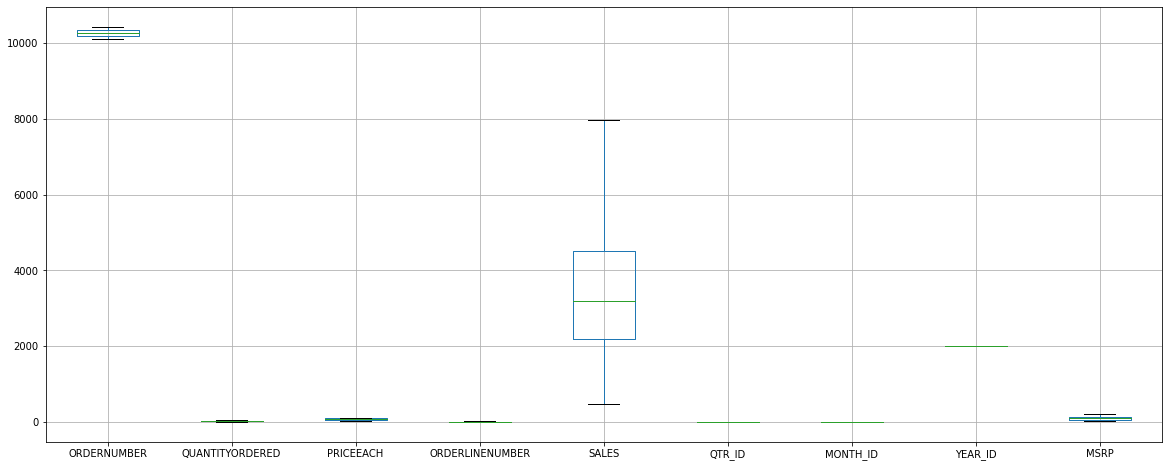

In [271]:
def myboxplot(data = df):
    plt.figure(figsize = (20,8))
    plt.grid()
    df.boxplot()

myboxplot()

# **3. La normalisation ou la mise à l'échelle des données pour les rendre comparables**

### ***La mise à l'échelle des données pour les rendre comparables***

### ***La mise à l'échelle des données est une technique qui permet de transformer les valeurs de différentes variables dans une même échelle pour les rendre comparables***

In [272]:
# Liste des noms de colonnes de variables continues
continuous_cols = ['YEAR_ID', 'ORDERNUMBER', 'ORDERLINENUMBER', 'MONTH_ID', 'QTR_ID', 'QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']

# Créer un objet MinMaxScaler
scaler = MinMaxScaler()

# Normaliser les variables continues
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])


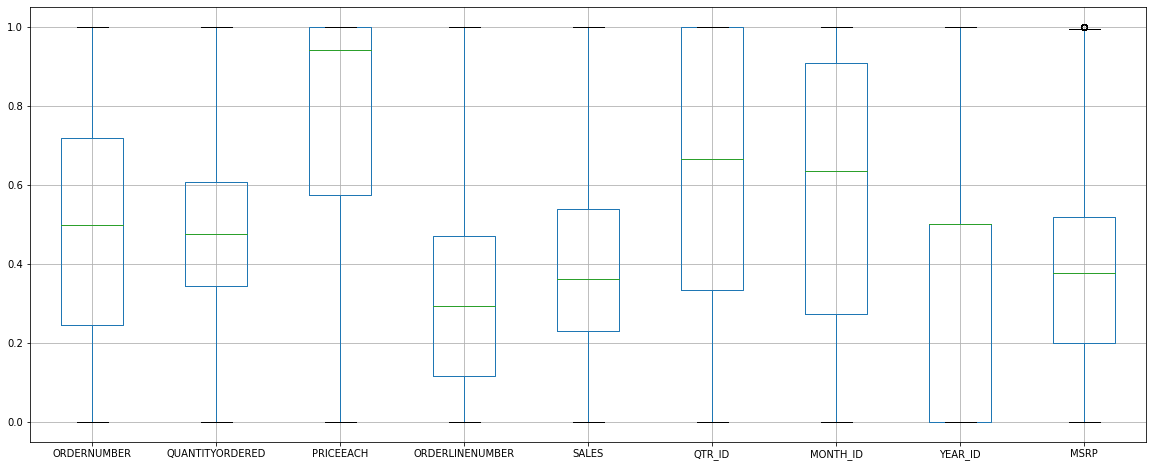

In [273]:
def myboxplot(data = df):
    plt.figure(figsize = (20,8))
    plt.grid()
    df.boxplot()

myboxplot()

## **4. La conversion des données en un format approprié**

### **Il y a plusieurs colonnes de type 'object' qui peuvent nécessiter une conversion en un format approprié. Par exemple, la colonne 'ORDERDATE' pourrait être convertie en format datetime pour faciliter l'analyse des données temporelles.**



In [274]:
df.dtypes

ORDERNUMBER         float64
QUANTITYORDERED     float64
PRICEEACH           float64
ORDERLINENUMBER     float64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID              float64
MONTH_ID            float64
YEAR_ID             float64
PRODUCTLINE          object
MSRP                float64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [276]:
# Convertir la colonne 'ORDERDATE' en format datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

### **convertir les colonnes 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME' et 'CONTACTFIRSTNAME' en format catégoriel.** :

In [277]:
category_cols = ['PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']
df[category_cols] = df[category_cols].astype('category')


In [279]:
# Après conversion
df.dtypes

ORDERNUMBER                float64
QUANTITYORDERED            float64
PRICEEACH                  float64
ORDERLINENUMBER            float64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                     float64
MONTH_ID                   float64
YEAR_ID                    float64
PRODUCTLINE               category
MSRP                       float64
PRODUCTCODE               category
CUSTOMERNAME              category
PHONE                     category
ADDRESSLINE1              category
CITY                      category
STATE                     category
POSTALCODE                category
COUNTRY                   category
TERRITORY                 category
CONTACTLASTNAME           category
CONTACTFIRSTNAME          category
DEALSIZE                  category
dtype: object

In [280]:
#Identifions les doublons
df.duplicated().sum()

0

## **5. Un algorithme permettant d’afficher le taux de pourcentage de valeurs aberrantes par colonne**

In [281]:
# Définir les colonnes à vérifier

cols = ['YEAR_ID', 'ORDERNUMBER', 'ORDERLINENUMBER', 'MONTH_ID', 'QTR_ID', 'QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']

# Calculer les limites d'intervalles pour chaque colonne
# (par exemple, pour une limite de 3 écarts types)
limits = {}
for col in cols:
    mean = np.mean(df[col])
    std = np.std(df[col])
    limits[col] = (mean - 3 * std, mean + 3 * std)

# Compter le nombre de valeurs aberrantes pour chaque colonne
outliers = {}
for col in cols:
    lower, upper = limits[col]
    outliers[col] = len(df[(df[col] < lower) | (df[col] > upper)])

# Calculer le pourcentage de valeurs aberrantes pour chaque colonne
outlier_percentages = {}
for col in cols:
    outlier_percentages[col] = outliers[col] / len(df) * 100

# Afficher les résultats
for col in cols:
    print(f"Pourcentage de valeurs aberrantes pour la colonne {col}: {outlier_percentages[col]:.2f}%")


Pourcentage de valeurs aberrantes pour la colonne YEAR_ID: 0.00%
Pourcentage de valeurs aberrantes pour la colonne ORDERNUMBER: 0.00%
Pourcentage de valeurs aberrantes pour la colonne ORDERLINENUMBER: 0.00%
Pourcentage de valeurs aberrantes pour la colonne MONTH_ID: 0.00%
Pourcentage de valeurs aberrantes pour la colonne QTR_ID: 0.00%
Pourcentage de valeurs aberrantes pour la colonne QUANTITYORDERED: 0.67%
Pourcentage de valeurs aberrantes pour la colonne PRICEEACH: 0.00%
Pourcentage de valeurs aberrantes pour la colonne SALES: 0.00%
Pourcentage de valeurs aberrantes pour la colonne MSRP: 0.00%


### **6. Dans la colonne "phone", supprimez tous les espaces, ponctuations et parenthèses**

In [282]:
# Suppression des espaces, ponctuations et parenthèses de la colonne "phone"
df["PHONE"] = df["PHONE"].apply(lambda x: re.sub(r'\s+|[-()]', '', x))

## **7. Etudier les relations entre:**
### ***a. deux variables quantitatives ?***


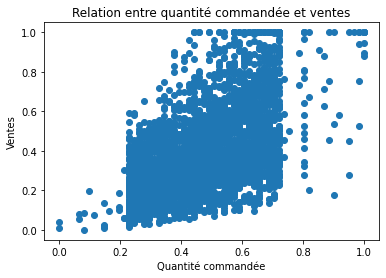

In [283]:
plt.scatter(df['QUANTITYORDERED'], df['SALES'])
plt.xlabel('Quantité commandée')
plt.ylabel('Ventes')
plt.title('Relation entre quantité commandée et ventes')
plt.show()

### ***b. deux variables qualitatives ?***
 

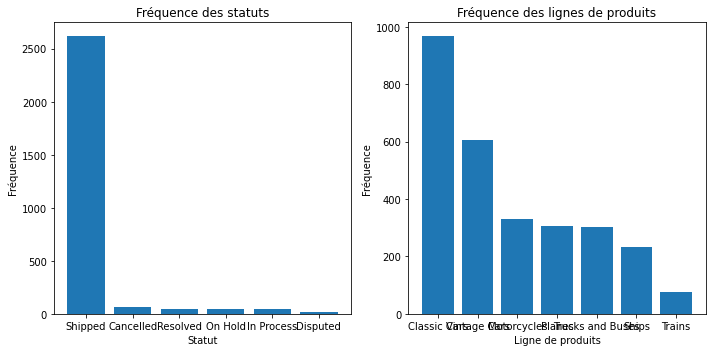

In [290]:
freq_status = df['STATUS'].value_counts()
freq_productline = df['PRODUCTLINE'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].bar(freq_status.index, freq_status.values)
axs[0].set_xlabel('Statut')
axs[0].set_ylabel('Fréquence')
axs[0].set_title('Fréquence des statuts')

axs[1].bar(freq_productline.index, freq_productline.values)
axs[1].set_xlabel('Ligne de produits')
axs[1].set_ylabel('Fréquence')
axs[1].set_title('Fréquence des lignes de produits')

plt.tight_layout()
plt.show()

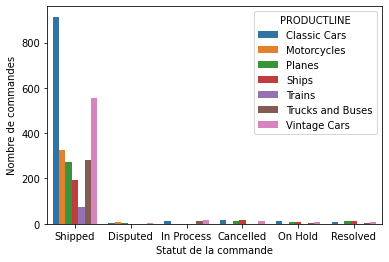

In [289]:
sns.countplot(x='STATUS', hue='PRODUCTLINE', data=df)
plt.xlabel('Statut de la commande')
plt.ylabel('Nombre de commandes')
plt.show()

### ***c. une variable quantitative et une variable qualitative ?***

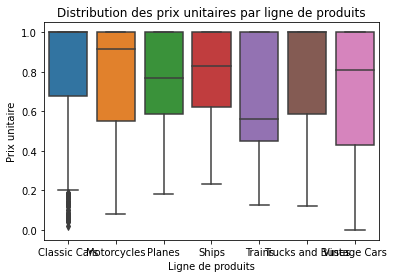

In [285]:
sns.boxplot(x='PRODUCTLINE', y='PRICEEACH', data=df)
plt.xlabel('Ligne de produits')
plt.ylabel('Prix unitaire')
plt.title('Distribution des prix unitaires par ligne de produits')
plt.show()

## **8. Quel(s) graphique(s) choisiriez-vous pour représenter les ventes réalisées par pays ?**

## ***Pour représenter les ventes réalisées par pays, un graphique adapté serait un graphique à barres, où chaque pays serait représenté par une barre ou l'angle serait proportionnelle aux ventes réalisées.***

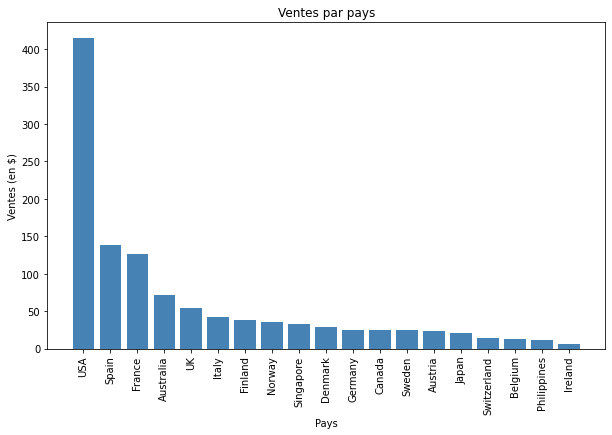

In [286]:
# On calcule les ventes totales par pays
Pays_Ventes = df.groupby('COUNTRY')['SALES'].sum()

# On trie les pays par ordre décroissant de ventes
Pays_Ventes = Pays_Ventes.sort_values(ascending=False)

# On crée le graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(Pays_Ventes.index, Pays_Ventes.values, color='steelblue')
plt.xticks(rotation=90)
plt.xlabel('Pays')
plt.ylabel('Ventes (en $)')
plt.title('Ventes par pays')
plt.show()


## **9. Sauvegardons les données complètement nettoyées dans un nouveau fichier**


In [250]:
df.to_csv('cleaned_data.csv', index = False),

(None,)